In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_columns", 100)

In [6]:
file_paths = {'in':'../../../data/prepared/activity_log_prepared.csv',
              'out':'../../../data/prepared/activity_log_prepared.csv'
             }

df = pd.read_csv(file_paths['in'])

# guarantee the timestamps are datetime objects
time_columns = ['start_time','end_time','ride_date']

for time_col in time_columns:
    df[time_col] = pd.to_datetime(df[time_col])

In [7]:
df.head()

,ride_id,row_count,segment_count,ride_date,start_time,end_time,elapsed_time,ride_elapsed_time,moving_time,ride_moving_time,distance,elapsed_distance,elevation_gain,elapsed_ascent,elevation_loss,elapsed_descent,elapsed_elevation,max_speed,ride_max_speed,avg_speed,ride_avg_speed,ride_cruise_speed,avg_power,ride_avg_power,ride_max_power,peak_20min_power,training_window_id,calories,perceived_exertion,simple_exertion,perceived_relative_effort
0,2975587283,1352,5,2020-01-02 14:02:00,2020-01-02 14:02:58+00:00,2020-01-02 14:29:32+00:00,1642,1595,1411,1352,5.275440,5.266647,64.165031,137.1458,NaN,138.7863,275.9321,20.132460,20.107674,13.473164,14.045509,14.547075,NaN,116.870855,5.520265e+02,124.782357,0,NaN,7.0,HARD,45.0
1,2992935347,1426,5,2020-01-08 13:20:00,2020-01-08 13:20:26+00:00,2020-01-08 13:49:06+00:00,1728,1721,1472,1426,5.231944,5.167961,151.908747,215.2336,NaN,153.2227,368.4563,31.764548,30.585623,12.807393,13.119808,14.154069,NaN,122.304555,9.702958e+02,131.178797,0,NaN,NaN,NaN,NaN
2,2994399692,1423,7,2020-01-08 22:08:00,2020-01-08 22:08:17+00:00,2020-01-08 22:35:04+00:00,1608,1608,1481,1423,5.294081,5.257609,87.028579,158.4723,NaN,219.4989,377.9712,25.501115,25.544568,12.876376,13.339800,15.443823,NaN,113.161863,1.299650e+03,126.461932,0,NaN,NaN,NaN,NaN
3,3248077156,2580,5,2020-04-02 21:38:00,2020-04-02 21:38:02+00:00,2020-04-02 23:03:45+00:00,5143,5144,2544,2580,6.437404,6.759676,237.698200,329.4124,182.908144,274.6197,604.0321,29.974995,219.457474,9.115003,9.548413,13.495738,NaN,402.495491,2.608934e+05,737.913342,1,NaN,5.0,NORMAL,45.0
4,3255473930,6416,12,2020-04-04 17:23:00,2020-04-04 17:23:43+00:00,2020-04-04 19:59:16+00:00,9348,9334,6356,6416,21.716916,22.730090,346.799121,575.1593,348.110235,576.4717,1151.6310,32.211935,513.399434,12.300812,12.764180,14.009717,NaN,2104.760010,3.328601e+06,121.068376,1,NaN,5.0,NORMAL,114.0


In [8]:
df.shape

(223, 31)

# 1. Time Column Investigations

In [9]:
# Drop ride_date since it doesn't contain the richest information compared to start_time
df.drop(['ride_date'], axis=1, inplace=True)

In [13]:
def compare_columns(df, comparison_title, strava_col, my_etl_col, plotsize=8):
    fig = plt.figure(figsize=(plotsize,plotsize))

    _ = sns.scatterplot(x=strava_col, y=my_etl_col, data=df, s=50, alpha=0.6)
    _ = plt.grid()
    _ = plt.title(comparison_title, fontsize=20)
    _ = plt.xlabel('Strava', fontsize=16)
    _ = plt.ylabel('My ETL', fontsize=16)

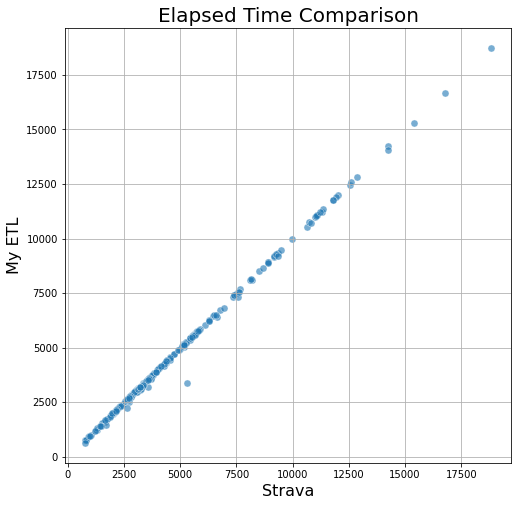

In [14]:
compare_columns(df, 'Elapsed Time Comparison', strava_col='elapsed_time', my_etl_col='ride_elapsed_time')

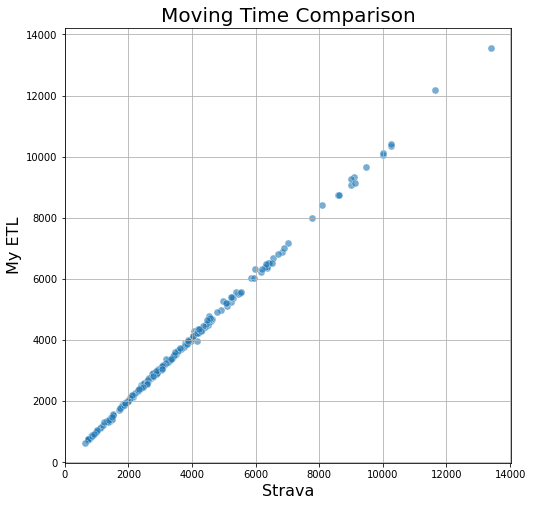

In [15]:
compare_columns(df, 'Moving Time Comparison', strava_col='moving_time', my_etl_col='ride_moving_time')

# 2. Distance Comparisons

In [ ]:
compare_columns(df, 'Moving Time Comparison', strava_col='moving_time', my_etl_col='ride_moving_time')